# Introduction to Computational Modeling and Simulation for Model-based Design

Outline for Module 2 (Computational Modeling and Simulation): 
1. Computer models and simulation overview
    1. Computational (numerical) model types:
        1. Empirical, data-driven
        2. Mechanistic, first principles
    2. Simulation types:
        1. Stochastic vs. Deterministic
        2. Steady-state vs. Transient
        3. Continuous vs. Discrete
2. Simulation schemes:
    1. Time-stepping
    2. Event-based
    3. Monte Carlo
    4. Agent-based
    5. Finite element

## Computational (numerical) model types

### Empirical, data-driven (_grey-box_ and _black-box_)

- Collect real-world data on physical phenomenon
- Create model that uses collected data to estimate physical phenomenon (system identification):
    - Frequentist regression techniques
    - Bayesian regression techniques
    - Nonlinear system identification
        - NARMAX (nonlinear auto-regressive moving average model)
        - Volterra series
        - Stochastic nonlinear model

### Mechanistic, first principles (_white-box_)

- Use mathematics that models a phenomenon at different levels
- Usually involves either partial differential equations (PDEs) or ordinary differential equations (ODEs)
- Create model that estimates physical phenomenon through computation:
    - Deterministic:
        - Discrete-event problems
        - Finite state machines
        - Initial value problem (ODEs)
        - Boundary value problem (ODEs)
        - Finite element method for boundary value problems (PDEs)
    - Stochastic:
        - Stochastic processes
        - Markov chains

### Simulating an electrical circuit (transient analysis as initial value problem)

Let's say that we have the following circuit:

![RC circuit](rc_circuit.gif)

_Figure 1: RC series circuit_

In this case, V is a DC constant voltage. We know that from our previous knowledge:

$V_R = R \cdot i$ and $V_C = \frac{1}{C} \int i \cdot dt$ and $i = \frac{dq}{dt}$, where:
- $i$ is the electrical current in Amps
- $q$ is the electrical charge in Coulombs
- $t$ is time in seconds

What can we use to solve for $V_C$ generically in terms of $R$, $V$, and $C$, assuming $V_C(0) = 0$?

We know through Kirchoff's that:  $V_C +  V_R = V$ (or alternatively $V - V_R - V_C = 0$).

$\frac{1}{C} \int i dt + i R = V$

Let's do the substitution to make $i$ a bit simpler to calculate:

$\frac{1}{C} q + \frac{dq}{dt} R = V$

Move it around so it's easy to get $\frac{dq}{dt}$:

$\frac{dq}{dt} R = V - \frac{q}{C}$


$\frac{dq}{dt} = \frac{V - \frac{q}{C}}{R}$

How would we get this in terms of $V_C$?

$V_C = \frac{q}{C}$, then $\frac{dq}{dt} = \frac{V - V_c}{R}$

$\frac{dV_c}{dt} = \frac{d}{dt}( \frac{q}{C})$ then we can just use $\frac{dq}{dt} = \frac{C dV_c}{dt}$

Combine and substitute terms:

$\frac{C dV_c}{dt} = \frac{V - V_c}{R}$

$\frac{dV_c}{dt} = \frac{V - V_c}{R C}$

Now, let's use `scipy.integrate` to solve this ODE for $V_C$ numerically, assuming $R = 5 \Omega$, $C = 0.02 F$, $V = 100 V$, and the initial value of $V_C(0) = 0$, $dV_C(0) = 0$:

In [4]:
def dvc_dt(t: float, vc: float, R: float, C: float, V: float) -> float:
    return (V - vc) / (R * C)

In [7]:
import scipy.integrate as spi

vc_result = spi.solve_ivp(
    fun=dvc_dt,
    t_span=(0.0, 10.0),
    y0=[0.],
    args=(5., 0.02, 100.)
)

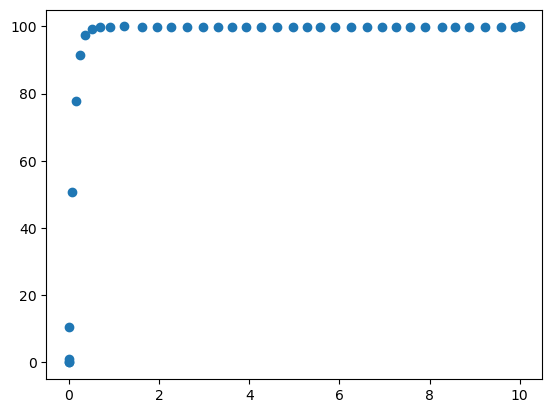

In [8]:
import matplotlib.pyplot as plt

plt.scatter(vc_result.t, vc_result.y)

When we run the simulation (numerical integration) for different parameter values (such as different $R$s, $C$s, and $V$s), this is called a **parameter sweep**.  Parameter sweeps make up the bulk of design engineering in combination with optimization.  Let's run a parameter sweep and visualize the time it takes to reach $V$ with different $R$ and $C$ values:

Now, let's say that V is no longer a single DC voltage, but instead is an AC source: $V = 85 \cos 150t$.

Let's see how we can modify the ODE and solve this numerically:

We see indeed that the capacitor has modified the phase of

### Solving a system of ODEs

Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). Let $x$ and $y$ represent rabbit and fox populations, respectively:

$\frac{dx}{dt} = x(a - by)$ and $\frac{dy}{dt} = -y(c -dx)$

Let's see how we can solve this using `scipy.integrate`, assuming a positive values for $a$, $b$, $c$, and $d$:

Let's try it vectorized:

### Other ODE system examples

See the following for more examples of ODE-based systems:

1. https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Introduction_to_Linear_Time-Invariant_Dynamic_Systems_for_Students_of_Engineering_(Hallauer)/05%3A_Basic_Electrical_Components_and_Circuits/5.04%3A_RC_Band-Pass_Filter
2. https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Introduction_to_Linear_Time-Invariant_Dynamic_Systems_for_Students_of_Engineering_(Hallauer)/10%3A_Second_Order_Systems/10.04%3A_Frequency-Response_Function_of_an_RC_Band-Pass_Filter